In [677]:
import pandas as pd
import datetime
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [678]:
def read_csv(path): return pd.read_csv( path, sep = ',' ) 

path = "/Users/michaelmainzer/Documents/GA/DSI/mike1/01-projects/assets/03-project3-assets/Iowa_Liquor_sales_sample.csv" # relative path
df = read_csv(path)

In [679]:
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [680]:
df.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [681]:
df.count()

Date                     270955
Store Number             270955
City                     270955
Zip Code                 270955
County Number            269878
County                   269878
Category                 270887
Category Name            270323
Vendor Number            270955
Item Number              270955
Item Description         270955
Bottle Volume (ml)       270955
State Bottle Cost        270955
State Bottle Retail      270955
Bottles Sold             270955
Sale (Dollars)           270955
Volume Sold (Liters)     270955
Volume Sold (Gallons)    270955
dtype: int64

In [682]:
df.shape

(270955, 18)

In [683]:
# Remove redundant columns
del df['Volume Sold (Gallons)']

In [684]:
# Remove $ from certain columns
df['State Bottle Cost'] = [x.lstrip('$')for x in df['State Bottle Cost']]
df['State Bottle Retail'] = [x.lstrip('$')for x in df['State Bottle Retail']]
df['Sale (Dollars)'] = [x.lstrip('$')for x in df['Sale (Dollars)']]

#Convert dates
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

# Drop or replace bad values

# Convert integers
df[['State Bottle Cost','State Bottle Retail', 'Sale (Dollars)']] = df[['State Bottle Cost','State Bottle Retail', 
                                                                        'Sale (Dollars)']].astype(float)

# Add Margin column and Price per liter column
df['Margin'] = df['State Bottle Retail'] - df['State Bottle Cost']
df['Price per Liter'] = (df['State Bottle Retail'] / df['Bottle Volume (ml)'])*1000

In [685]:
# Sales per store, 2015. Only includes stores that were open for all of 2015.

# Filter by our start and end dates
df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20151231")
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
sales2015 = df[mask]

# Group by store name
sales2015 = sales2015.groupby(by=["Store Number"], as_index=False)
# Compute sums, means
sales2015 = sales2015.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Price per Liter": np.mean,
                   "Zip Code": lambda x: x.iloc[0], # just extract once, should be the same
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0]})
# Collapse the column indices
sales2015.columns = [' '.join(col).strip() for col in sales2015.columns.values]

In [686]:
sales2015.head()

,Store Number,City <lambda>,Sale (Dollars) sum,Sale (Dollars) mean,County Number <lambda>,Price per Liter mean,Zip Code <lambda>,Volume Sold (Liters) sum,Volume Sold (Liters) mean,Margin mean
0,2106,CEDAR FALLS,146326.22,277.658861,7.0,17.856601,50613,9731.85,18.466509,5.166319
1,2113,GOWRIE,9310.22,63.334830,94.0,18.504292,50543,659.85,4.488776,5.445102
2,2130,WATERLOO,111871.43,285.386301,7.0,16.835669,50703,6891.37,17.580026,4.925842
3,2152,ROCKWELL,7721.08,54.759433,17.0,13.020983,50469,633.37,4.491986,4.322624
4,2178,WAUKON,24324.18,102.633671,3.0,16.062136,52172,1917.12,8.089114,4.868861


In [687]:
sales2015.dtypes

Store Number                   int64
City <lambda>                 object
Sale (Dollars) sum           float64
Sale (Dollars) mean          float64
County Number <lambda>       float64
Price per Liter mean         float64
Zip Code <lambda>             object
Volume Sold (Liters) sum     float64
Volume Sold (Liters) mean    float64
Margin mean                  float64
dtype: object

In [688]:
sales2015.count()

Store Number                 1372
City <lambda>                1372
Sale (Dollars) sum           1372
Sale (Dollars) mean          1372
County Number <lambda>       1371
Price per Liter mean         1372
Zip Code <lambda>            1372
Volume Sold (Liters) sum     1372
Volume Sold (Liters) mean    1372
Margin mean                  1372
dtype: int64

In [689]:
sales2015.shape

(1372, 10)

In [690]:
#Make dataframe that computes info for sales by store, made in the first quarter of 2015
df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date2 = pd.Timestamp("20150101")
end_date2 = pd.Timestamp("20150331")
mask2 = (df['Date'] >= start_date2) & (df['Date'] <= end_date2)
sales2015Q1 = df[mask2]

sales2015Q1 = sales2015Q1.groupby(by=["Store Number"], as_index=False)

sales2015Q1 = sales2015Q1.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Price per Liter": np.mean,
                   "Zip Code": lambda x: x.iloc[0], # just extract once, should be the same
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0]})

sales2015Q1.columns = [' '.join(col).strip() for col in sales2015Q1.columns.values]

In [691]:
del sales2015Q1['City <lambda>']
del sales2015Q1['County Number <lambda>']
del sales2015Q1['Price per Liter mean']
del sales2015Q1['Zip Code <lambda>']
del sales2015Q1['Volume Sold (Liters) sum']
del sales2015Q1['Volume Sold (Liters) mean']
del sales2015Q1['Margin mean']
print sales2015Q1.columns

Index([u'Store Number', u'Sale (Dollars) sum', u'Sale (Dollars) mean'], dtype='object')


In [692]:
sales2015Q1.columns = [u'Store Number', u'Q1 Total Sales', u'Q1 Average Sales']
sales2015Q1.shape

(1262, 3)

In [693]:
#join tables on 'Store Number' so each store has its yearly totals and corresponding Q1 total and average sale
#note that some Q1 values are NaN, meaning some stores either opened after Q1 in 2015, and others may be seasonal
sales15 = pd.merge(sales2015, sales2015Q1, on='Store Number', how='outer')

In [694]:
# Sales per store, 2016, to date. 

# Filter by our start and end dates
df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date4 = pd.Timestamp("20160101")
mask4 = (df['Date'] >= start_date4)
sales2016 = df[mask4]

# Group by store name
sales2016 = sales2016.groupby(by=["Store Number"], as_index=False)
# Compute sums, means
sales2016 = sales2016.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Price per Liter": np.mean,
                   "Zip Code": lambda x: x.iloc[0], # just extract once, should be the same
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0]})
# Collapse the column indices
sales2016.columns = [' '.join(col).strip() for col in sales2016.columns.values]

In [695]:
sales2016.dropna(inplace=True)

In [696]:
#Make dataframe that computes info for sales by store, made in the first quarter of 2016
df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date5 = pd.Timestamp("20160101")
end_date5 = pd.Timestamp("20160331")
mask5 = (df['Date'] >= start_date5) & (df['Date'] <= end_date5)
sales2016Q1 = df[mask5]

sales2016Q1 = sales2016Q1.groupby(by=["Store Number"], as_index=False)

sales2016Q1 = sales2016Q1.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Price per Liter": np.mean,
                   "Zip Code": lambda x: x.iloc[0], # just extract once, should be the same
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0]})

sales2016Q1.columns = [' '.join(col).strip() for col in sales2016Q1.columns.values]

In [697]:
sales2016Q1.dropna(inplace=True)

In [698]:
del sales2016Q1['City <lambda>']
del sales2016Q1['County Number <lambda>']
del sales2016Q1['Price per Liter mean']
del sales2016Q1['Zip Code <lambda>']
del sales2016Q1['Volume Sold (Liters) sum']
del sales2016Q1['Volume Sold (Liters) mean']
del sales2016Q1['Margin mean']
print sales2016Q1.columns

Index([u'Store Number', u'Sale (Dollars) sum', u'Sale (Dollars) mean'], dtype='object')


In [699]:
sales2016Q1.columns = [u'Store Number', u'Q1 Total Sales', u'Q1 Average Sale']

In [700]:
sales16 = pd.merge(sales2016, sales2016Q1, on='Store Number', how='outer')

In [701]:
del sales16['City <lambda>']
del sales16['County Number <lambda>']
del sales16['Price per Liter mean']
del sales16['Zip Code <lambda>']
del sales16['Volume Sold (Liters) sum']
del sales16['Volume Sold (Liters) mean']
del sales16['Margin mean']
print sales16.columns

Index([       u'Store Number',  u'Sale (Dollars) sum', u'Sale (Dollars) mean',
            u'Q1 Total Sales',     u'Q1 Average Sale'],
      dtype='object')


In [702]:
sales16.columns = [u'Store Number', u'Total_Sales_2016_toDate', u'Average_Sale_2016_toDate', u'Q1 Total Sales', u'Q1 Average Sale']

In [703]:
sales1516 = pd.merge(sales15, sales16, on='Store Number', how='outer')

In [704]:
sales1516.head()

,Store Number,City <lambda>,Sale (Dollars) sum,Sale (Dollars) mean,County Number <lambda>,Price per Liter mean,Zip Code <lambda>,Volume Sold (Liters) sum,Volume Sold (Liters) mean,Margin mean,Q1 Total Sales_x,Q1 Average Sales,Total_Sales_2016_toDate,Average_Sale_2016_toDate,Q1 Total Sales_y,Q1 Average Sale
0,2106.0,CEDAR FALLS,146326.22,277.658861,7.0,17.856601,50613,9731.85,18.466509,5.166319,39287.29,304.552636,30523.75,240.344488,30523.75,240.344488
1,2113.0,GOWRIE,9310.22,63.334830,94.0,18.504292,50543,659.85,4.488776,5.445102,2833.25,67.458333,2065.90,55.835135,2065.90,55.835135
2,2130.0,WATERLOO,111871.43,285.386301,7.0,16.835669,50703,6891.37,17.580026,4.925842,24272.57,278.995057,27856.11,238.086410,27856.11,238.086410
3,2152.0,ROCKWELL,7721.08,54.759433,17.0,13.020983,50469,633.37,4.491986,4.322624,2003.46,62.608125,1376.43,45.881000,1376.43,45.881000
4,2178.0,WAUKON,24324.18,102.633671,3.0,16.062136,52172,1917.12,8.089114,4.868861,5856.41,122.008542,5588.50,96.353448,5588.50,96.353448


In [705]:
sales1516.dropna(inplace=True)


In [729]:
sales1516.columns = [u'storeNumber', u'city', u'totalSales15',
       u'averageSale15', u'countyNumber',
       u'averagePrice(L)', u'zipCode',
       u'totalVolSold(L)15',
       u'averageVolSold(L)15',
       u'averageMargin15', u'predictor',
       u'Q1AverageSales15',
       u'TotalSales16toDate',
       u'AverageSale16toDate',
       u'Q1TotalSales16', u'Q1AverageSale16']

In [730]:
sales1516.head()

,storeNumber,city,totalSales15,averageSale15,countyNumber,averagePrice(L),zipCode,totalVolSold(L)15,averageVolSold(L)15,averageMargin15,predictor,Q1AverageSales15,TotalSales16toDate,AverageSale16toDate,Q1TotalSales16,Q1AverageSale16
0,2106.0,CEDAR FALLS,146326.22,277.658861,7.0,17.856601,50613,9731.85,18.466509,5.166319,39287.29,304.552636,30523.75,240.344488,30523.75,240.344488
1,2113.0,GOWRIE,9310.22,63.334830,94.0,18.504292,50543,659.85,4.488776,5.445102,2833.25,67.458333,2065.90,55.835135,2065.90,55.835135
2,2130.0,WATERLOO,111871.43,285.386301,7.0,16.835669,50703,6891.37,17.580026,4.925842,24272.57,278.995057,27856.11,238.086410,27856.11,238.086410
3,2152.0,ROCKWELL,7721.08,54.759433,17.0,13.020983,50469,633.37,4.491986,4.322624,2003.46,62.608125,1376.43,45.881000,1376.43,45.881000
4,2178.0,WAUKON,24324.18,102.633671,3.0,16.062136,52172,1917.12,8.089114,4.868861,5856.41,122.008542,5588.50,96.353448,5588.50,96.353448


In [731]:
sales1516.to_csv('../assets/03-project3-assets/Iowa_liquor_sales_2015-16.csv')

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [728]:
sales1516.corr()

,storeNumber,totalSales15,averageSale15,countyNumber,averagePrice(L),totalVolSold(L)15,averageVolSold(L)15,averageMargin15,Predictor,Q1AverageSales15,TotalSales16toDate,AverageSale16toDate,Q1TotalSales16,Q1AverageSale16
storeNumber,1.000000,-0.357715,0.027066,0.008424,0.073260,-0.396328,-0.048163,-0.259780,-0.347324,-0.000285,-0.342937,-0.020088,-0.342937,-0.020088
totalSales15,-0.357715,1.000000,0.425807,0.043170,0.168088,0.992427,0.417130,0.297956,0.983082,0.409841,0.969142,0.331544,0.969142,0.331544
averageSale15,0.027066,0.425807,1.000000,0.014483,0.192467,0.418048,0.912835,0.400706,0.397290,0.900597,0.374434,0.771606,0.374434,0.771606
countyNumber,0.008424,0.043170,0.014483,1.000000,0.100569,0.034856,-0.010061,0.023168,0.046815,0.010714,0.044658,-0.001830,0.044658,-0.001830
averagePrice(L),0.073260,0.168088,0.192467,0.100569,1.000000,0.125970,-0.055924,0.428103,0.161116,0.146796,0.155199,0.131591,0.155199,0.131591
totalVolSold(L)15,-0.396328,0.992427,0.418048,0.034856,0.125970,1.000000,0.438793,0.290371,0.974588,0.403511,0.956504,0.319583,0.956504,0.319583
averageVolSold(L)15,-0.048163,0.417130,0.912835,-0.010061,-0.055924,0.438793,1.000000,0.281963,0.394366,0.851124,0.367119,0.710034,0.367119,0.710034
averageMargin15,-0.259780,0.297956,0.400706,0.023168,0.428103,0.290371,0.281963,1.000000,0.285674,0.357283,0.278217,0.305234,0.278217,0.305234
Predictor,-0.347324,0.983082,0.397290,0.046815,0.161116,0.974588,0.394366,0.285674,1.000000,0.426981,0.951380,0.317024,0.951380,0.317024
Q1AverageSales15,-0.000285,0.409841,0.900597,0.010714,0.146796,0.403511,0.851124,0.357283,0.426981,1.000000,0.365847,0.773824,0.365847,0.773824


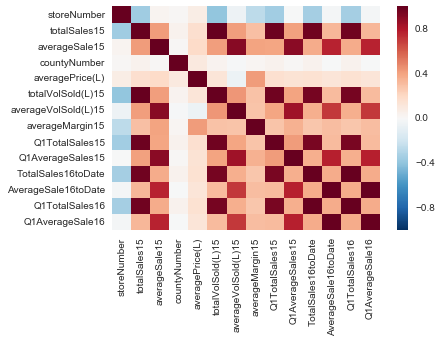

In [716]:
sns.heatmap(sales1516.corr())

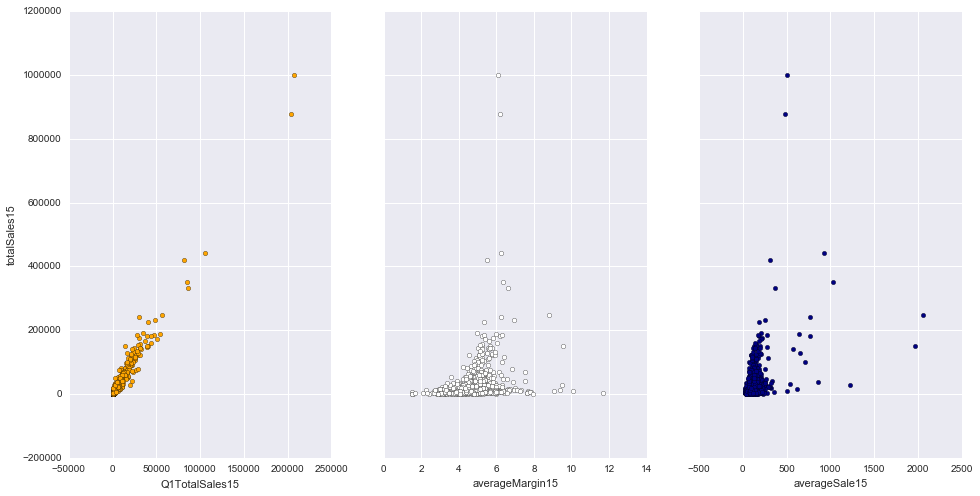

In [717]:
fig, axs = plt.subplots(1, 3, sharey=True) # ( _, _ )

sales1516.plot(kind='scatter', x='Q1TotalSales15', y='totalSales15', ax=axs[0], figsize=(16, 8), color='orange')
sales1516.plot(kind='scatter', x='averageMargin15', y='totalSales15', ax=axs[1], color='w')
sales1516.plot(kind='scatter', x='averageSale15', y='totalSales15', ax=axs[2],color='navy')

In [721]:
import statsmodels.formula.api as smf

model = smf.ols(formula="totalSales15 ~ Q1TotalSales15", data=sales1516)

fit = model.fit_regularized()

predictions = fit.predict(sales1516[['Q1TotalSales15']])

fit.summary()

#lm.summary()

#Prob (F-stat) is the p-value for the model as a whole?

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           totalSales15   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 3.382e+04
Date:                Thu, 23 Jun 2016   Prob (F-statistic):               0.00
Time:                        17:59:18   Log-Likelihood:                -12496.
No. Observations:                1176   AIC:                         2.500e+04
Df Residuals:                    1174   BIC:                         2.501e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        727.4862    315.621      2.305      0.021       108.242  1346.731
Q1TotalSales15     4.4755      0.024    183.897      0.000         4.428     4.523
==============================================================================
Omnibus:                      647.948   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39701.693
Skew:                           1.747   Prob(JB):                         0.00
Kurtosis:                      31.250   Cond. No.                     1.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

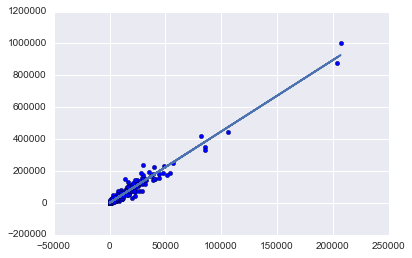

In [719]:
plt.scatter(sales1516['Q1TotalSales15'], sales1516['totalSales15'])
plt.plot(sales1516['Q1TotalSales15'],predictions)

In [724]:
predictions16 = fit.predict(sales1516[['Q1TotalSales16']])


plt.scatter(sales1516['Q1TotalSales16'], sales1516['totalSales15'])
plt.plot(sales1516['Q1TotalSales16'],predictions16)

NameError: name 'Q1TotalSales15' is not defined